# Foundations of Machine Learning

## Introduction

## scikit-learn
scikit-learn is the most prominent Python library for machine learning:

* Contains many state-of-the-art machine learning algorithms
* Offers [comprehensive documentation](http://scikit-learn.org/stable/documentation) about each algorithm
* Widely used, and a wealth of [tutorials](http://scikit-learn.org/stable/user_guide.html) and code snippets are available 
* scikit-learn works well with numpy, scipy, pandas, matplotlib,...

## Algorithms
See the [Reference](http://scikit-learn.org/dev/modules/classes.html)

__Supervised learning:__

* Linear models (Ridge, Lasso, Elastic Net, ...)
* Support Vector Machines
* Tree-based methods (Classification/Regression Trees, Random Forests,...)
* Nearest neighbors
* Neural networks 
* Gaussian Processes
* Feature selection

__Unsupervised learning:__
    
* Clustering (KMeans, ...)
* Matrix Decomposition (PCA, ...)
* Manifold Learning (Embeddings)
* Density estimation
* Outlier detection

__Model selection and evaluation:__

* Cross-validation
* Grid-search
* Lots of metrics

### Data import
Multiple options:

* A few toy datasets are included in `sklearn.datasets`
* You can import data files (CSV) with `pandas` or `numpy`
* You can import 1000s of machine learning datasets from OpenML

## Example: classification
Classify types of Iris flowers (setosa, versicolor, or virginica) based on the flower sepals and petal leave sizes.
![Iris image](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

In [1]:
from preamble import * # Imports to make code nicer
%matplotlib inline
InteractiveShell.ast_node_interactivity = "all"
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:150%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

Note: scikitlearn will return a `Bunch` object (similar to a `dict`)

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print("Keys of iris_dataset: {}".format(iris_dataset.keys()))
print(iris_dataset['DESCR'][:193] + "\n...")

Keys of iris_dataset: dict_keys(['feature_names', 'DESCR', 'target_names', 'data', 'target'])
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


The targets (classes) and features are stored as `list`s, the data as an `ndarray`

In [3]:
print("Targets: {}".format(iris_dataset['target_names']))
print("Features: {}".format(iris_dataset['feature_names']))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("First 5 rows:\n{}".format(iris_dataset['data'][:5])) 

Targets: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data: (150, 4)
First 5 rows:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


The targets are stored separately as an `ndarray`, with indices pointing to the features

In [4]:
print("Target names: {}".format(iris_dataset['target_names']))
print("Targets:\n{}".format(iris_dataset['target']))

Target names: ['setosa' 'versicolor' 'virginica']
Targets:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Measuring Success: Training and testing data
To test our classifier, we need to test it on unseen data.  
`train_test_split`: splits data randomly in 75% training and 25% test data.


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], 
    random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


Note: there are several problems with this approach that we will discuss later:

* Why 75%? Are there better ways to split?
* What if one random split yields  different models than another?
* What if all examples of one class all end up in the training/test set?

### First things first: Look at your data
Let's use `pandas` to visualize our data.

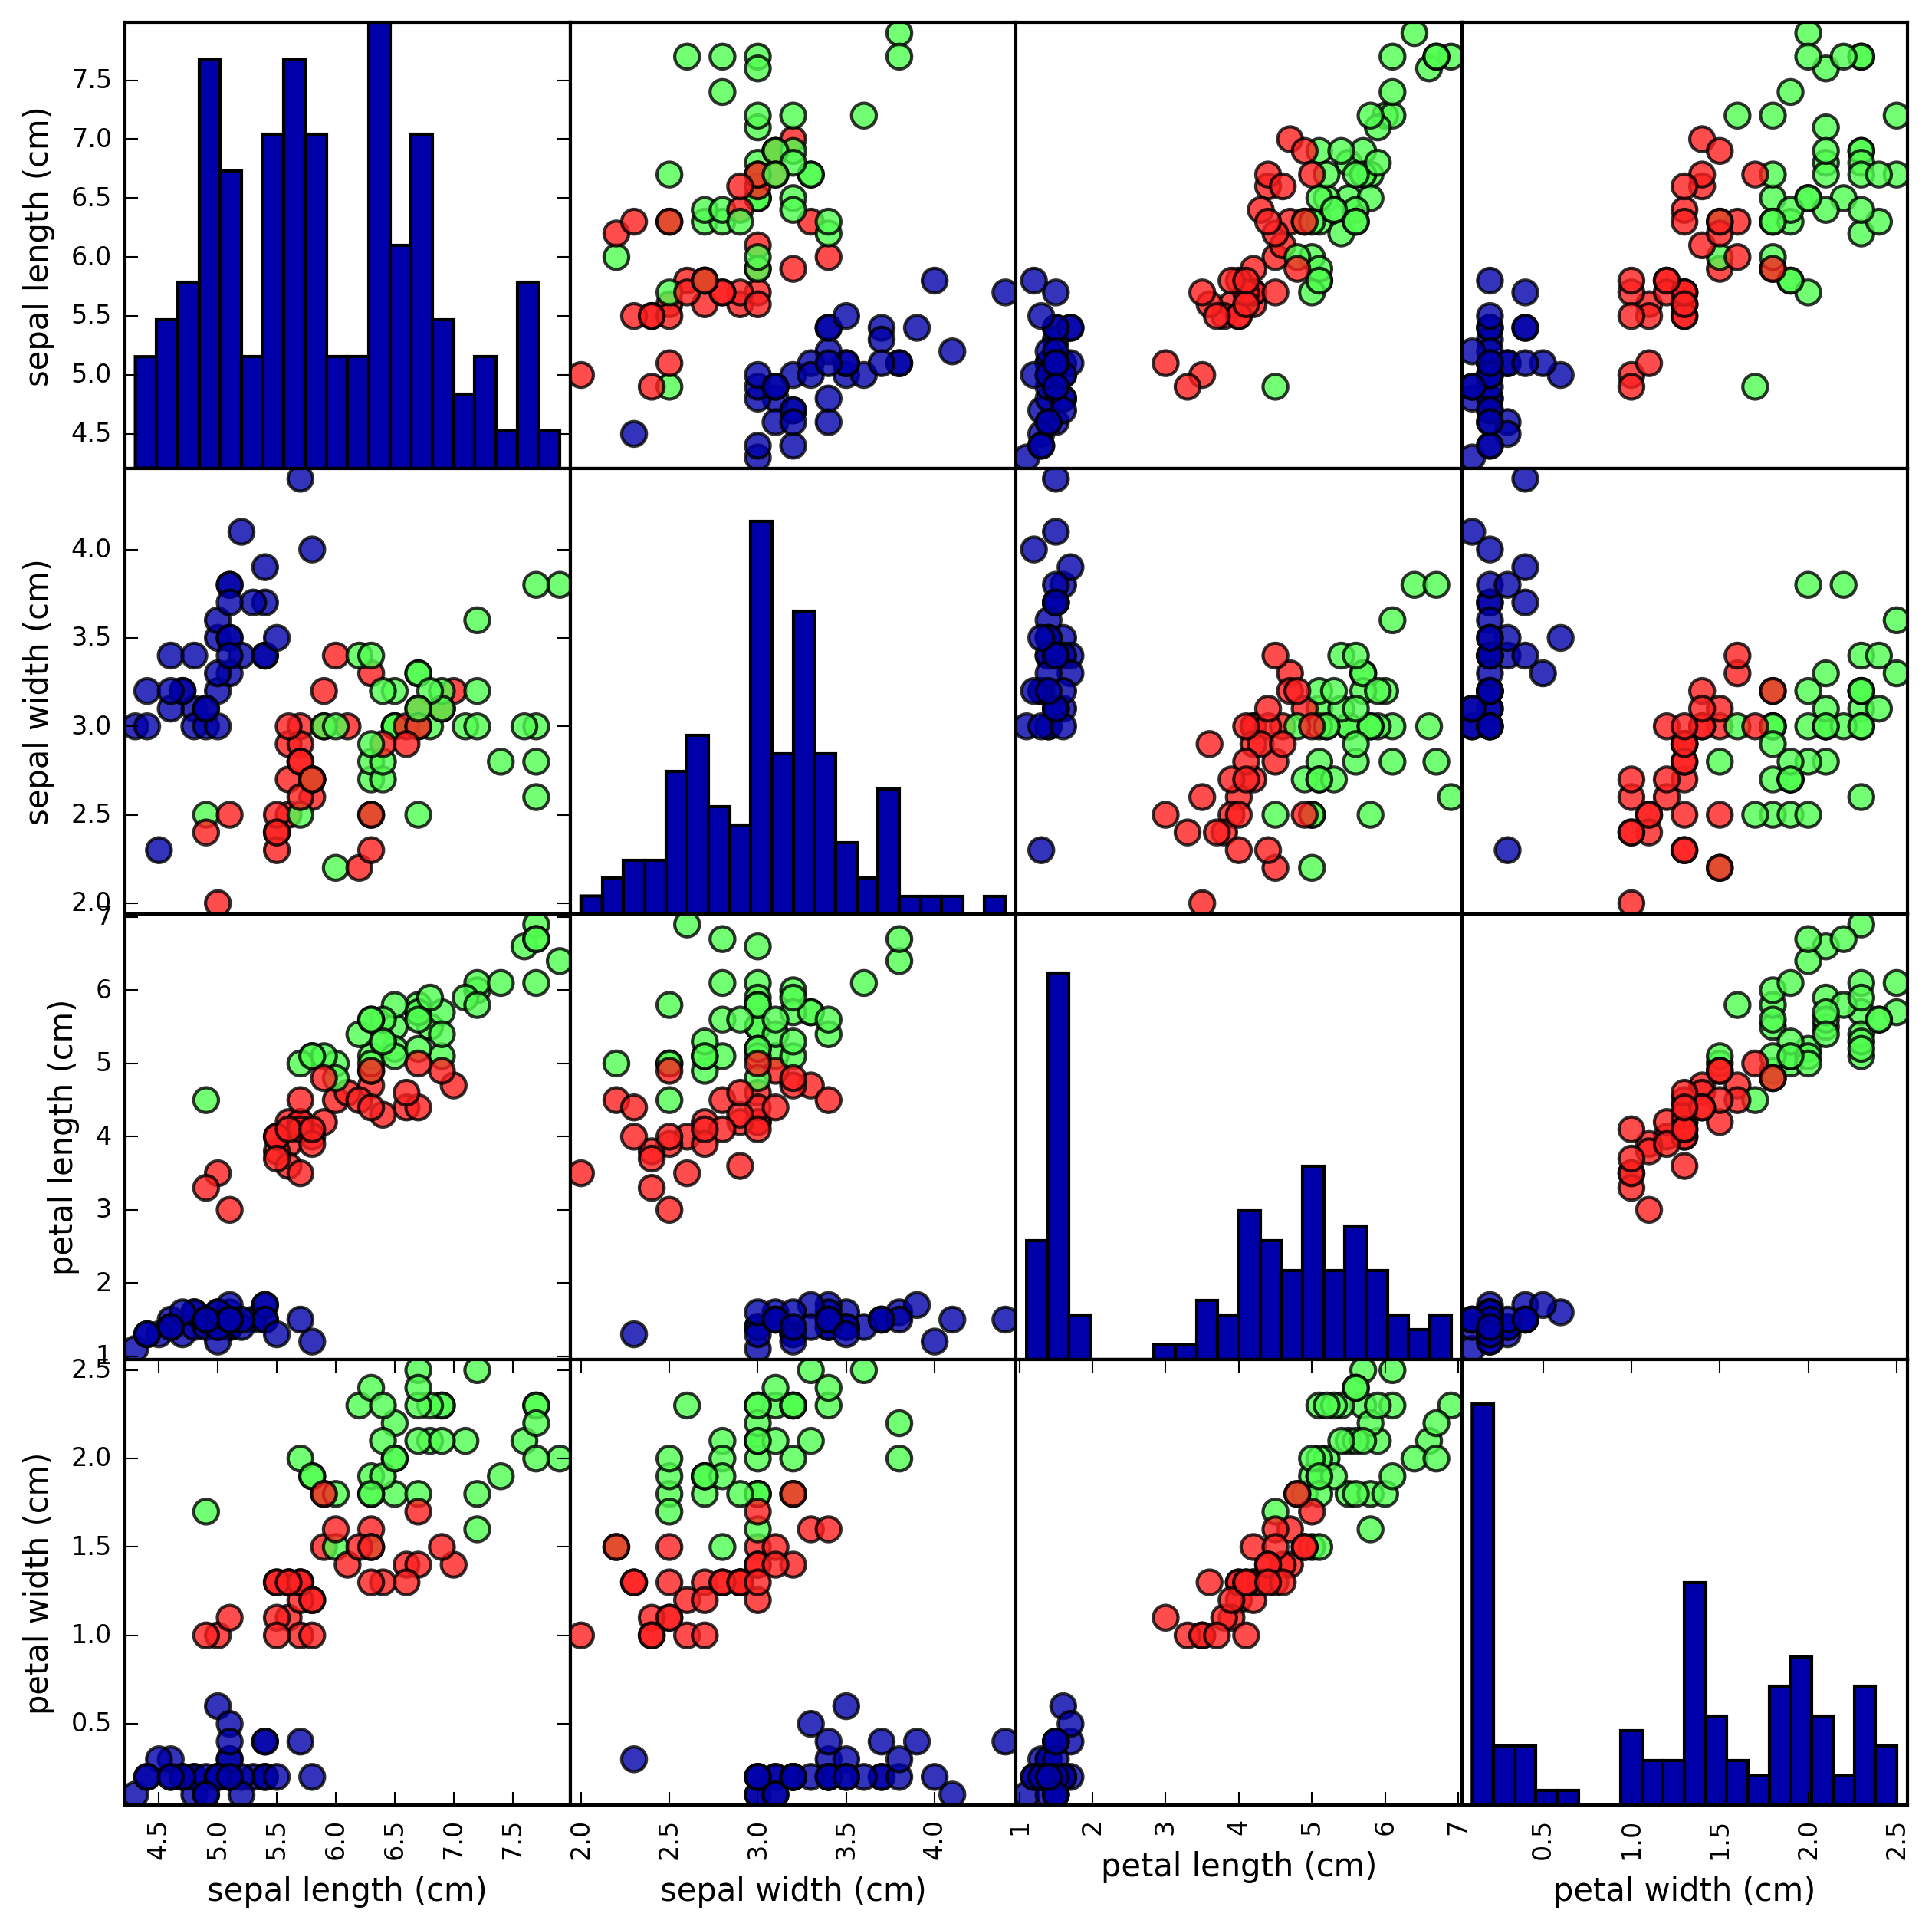

In [6]:
# Build a DataFrame with training examples and feature names
iris_df = pd.DataFrame(X_train, 
                       columns=iris_dataset.feature_names)

# scatter matrix from the dataframe, color by class
sm = pd.scatter_matrix(iris_df, c=y_train, figsize=(10, 10), 
                  marker='o', hist_kwds={'bins': 20}, s=60, 
                  alpha=.8, cmap=mglearn.cm3)

### Building your first model
All scikitlearn classifiers follow the same interface

In [ ]:
class SupervisedEstimator(...):
    def __init__(self, hyperparam, ...):

    def fit(self, X, y):   # Fit/model the training data
        ...                # given data X and targets y
        return self
     
    def predict(self, X):  # Make predictions
        ...                # on unseen data X  
        return y_pred
    
    def score(self, X, y): # Predict and compare to true
        ...                # labels y                
        return score

### K nearest nearest neighbors

* Simplest learning algorithm
* Just stores the training set (in a special data structure)
* To make a prediction for a new data point, find the _k_ points in the training set that are closest to the new point. 
* Return the class that is most prevalent among the _k_ training points
    * Can also return a probability per class

![kNN image](http://bdewilde.github.io/assets/images/2012-10-26-knn-concept.png)

kNN is included in `sklearn.neighbors`, so let's build our first model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Making predictions
Let's create a new example and ask the kNN model to classify it

In [9]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


### Evaluating the model
Feeding all test examples to the model yields all predictions

In [10]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


We can now just count what percentage was correct

In [11]:
print("Score: {:.2f}".format(np.mean(y_pred == y_test)))

Score: 0.97


The `score` function does the same thing (by default)

In [12]:
print("Score: {:.2f}".format(knn.score(X_test, y_test)))

Score: 0.97


## Summary
This is all you need to train and evaluate a model

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], 
    random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Score: {:.2f}".format(knn.score(X_test, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Score: 0.97


## The road ahead
This is NOT how we _actually_ build and evaluate machine learning models
There are many more things to take into account:

* How to build optimal train/test splits?
* Is the percentage of correct predictions actually a good evaluator?
* Which other algorithms can I try to build models?
* How do we tune the hyperparameters (e.g. the _k_ of kNN)?
* What if the data has missing values, outliers, noise,...?
* Which features can we actually use to build models?
* Will future examples be anything like our current data?